In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
cols = [
    'Severity', 'Start_Time', 'City', 'State',
    'Weather_Condition', 'Temperature(F)',
    'Visibility(mi)', 'Wind_Speed(mph)',
    'Precipitation(in)', 'Sunrise_Sunset',
    'Start_Lat', 'Start_Lng'
]

df = pd.read_csv("US_Accidents_March23.csv", usecols=cols)
df.head()

,Severity,Start_Time,Start_Lat,Start_Lng,City,State,Temperature(F),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset
0,3,2016-02-08 05:46:00,39.865147,-84.058723,Dayton,OH,36.9,10.0,NaN,0.02,Light Rain,Night
1,2,2016-02-08 06:07:59,39.928059,-82.831184,Reynoldsburg,OH,37.9,10.0,NaN,0.00,Light Rain,Night
2,2,2016-02-08 06:49:27,39.063148,-84.032608,Williamsburg,OH,36.0,10.0,3.5,NaN,Overcast,Night
3,3,2016-02-08 07:23:34,39.747753,-84.205582,Dayton,OH,35.1,9.0,4.6,NaN,Mostly Cloudy,Night
4,2,2016-02-08 07:39:07,39.627781,-84.188354,Dayton,OH,36.0,6.0,3.5,NaN,Mostly Cloudy,Day


In [4]:
df['Start_Time'] = pd.to_datetime(
    df['Start_Time'],
    format='%Y-%m-%d %H:%M:%S.%f',
    errors='coerce'
)
df['Hour'] = df['Start_Time'].dt.hour
df['Month'] = df['Start_Time'].dt.month

In [5]:
df = df.dropna(subset=['Weather_Condition','Start_Lat','Start_Lng'])

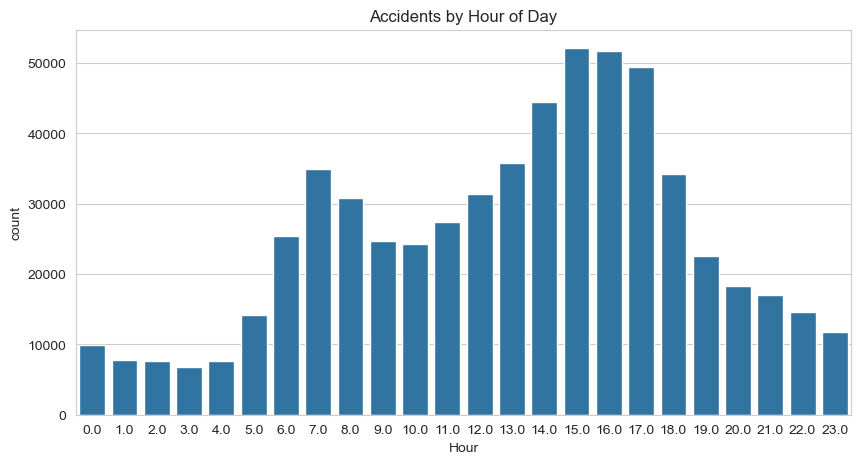

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x='Hour', data=df)
plt.title("Accidents by Hour of Day")
plt.show()

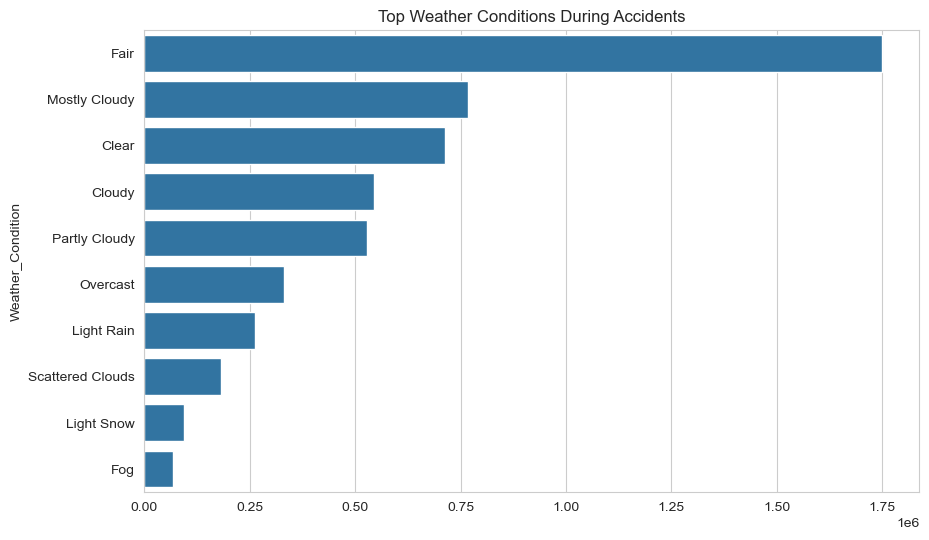

In [11]:
top_weather = df['Weather_Condition'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_weather.values, y=top_weather.index)
plt.title("Top Weather Conditions During Accidents")
plt.show()

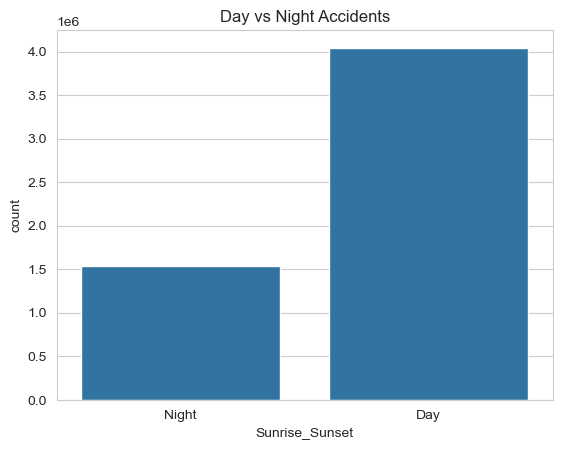

In [12]:
sns.countplot(x='Sunrise_Sunset', data=df)
plt.title("Day vs Night Accidents")
plt.show()


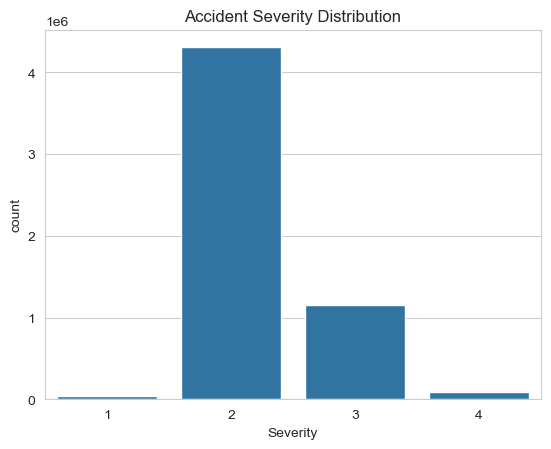

In [13]:
sns.countplot(x='Severity', data=df)
plt.title("Accident Severity Distribution")
plt.show()

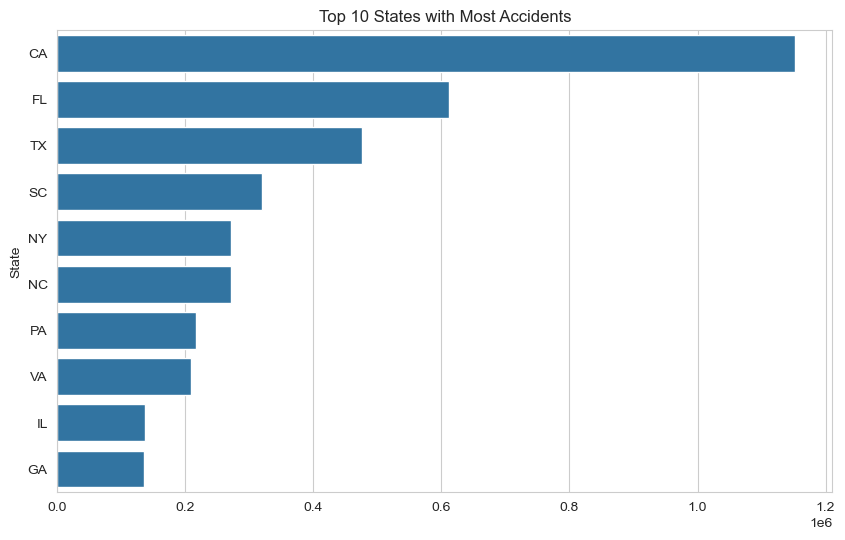

In [14]:
top_states = df['State'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_states.values, y=top_states.index)
plt.title("Top 10 States with Most Accidents")
plt.show()